# Exploratary Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Collection and Feature Engineering

In [2]:
df=pd.read_csv('bigdata_train.csv')

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.shape

(8523, 12)

In [6]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Univariate Analysis

In [8]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
FDX31     9
FDU12     9
NCB18     9
         ..
FDO33     1
FDE52     1
FDN52     1
FDT35     1
FDK57     1
Name: Item_Identifier, Length: 1559, dtype: int64

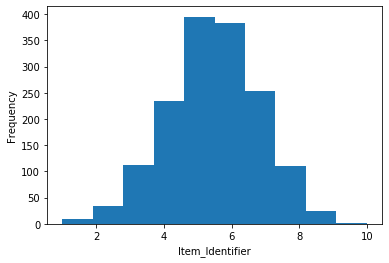

In [9]:
df['Item_Identifier'].value_counts().plot.hist()
plt.xlabel('Item_Identifier')
plt.show()

In [10]:
print('Types of Fat_content in products','\n',df['Item_Fat_Content'].unique())
print('No of quantities of Fat_content in products','\n',df['Item_Fat_Content'].value_counts().reset_index())

Types of Fat_content in products 
 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
No of quantities of Fat_content in products 
      index  Item_Fat_Content
0  Low Fat              5089
1  Regular              2889
2       LF               316
3      reg               117
4  low fat               112


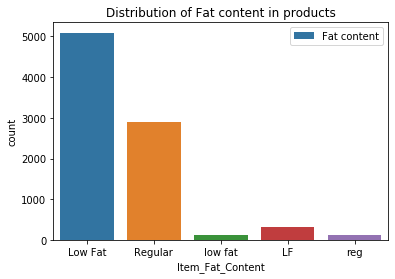

In [11]:
sns.countplot(df['Item_Fat_Content'],label='Fat content')
plt.title('Distribution of Fat content in products')
plt.legend()
plt.show()

Differnt products available Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


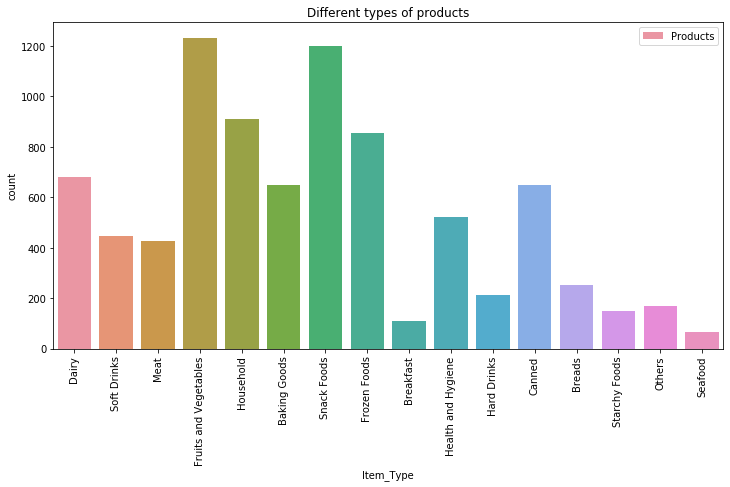

In [12]:
print('Differnt products available', df['Item_Type'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['Item_Type'],label='Products')
plt.title('Different types of products')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [13]:
print('MRP of the products','\n',df['Item_MRP'])
print('\n')
print('Maximum price in the products','\n',df['Item_MRP'].max())
print('\n')
print('Minimum price in the products','\n',df['Item_MRP'].min())
print('\n')
print('Average price in the products','\n',df['Item_MRP'].mean())

MRP of the products 
 0       249.8092
1        48.2692
2       141.6180
3       182.0950
4        53.8614
          ...   
8518    214.5218
8519    108.1570
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 8523, dtype: float64


Maximum price in the products 
 266.8884


Minimum price in the products 
 31.29


Average price in the products 
 140.9927819781768


Different types of outlets ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


No of outlets OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64




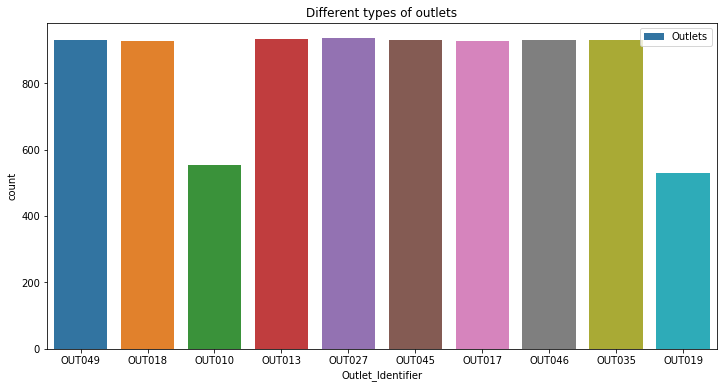

In [14]:
print('Different types of outlets',df['Outlet_Identifier'].unique())
print('\n')
print('No of outlets',df['Outlet_Identifier'].value_counts())
print('\n')
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Identifier'],label='Outlets')
plt.title('Different types of outlets')
plt.xticks(rotation=360)
plt.legend()
plt.show()

Size of the outlet Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Types of the outlet ['Medium' nan 'High' 'Small']


No. of Nan values 2410


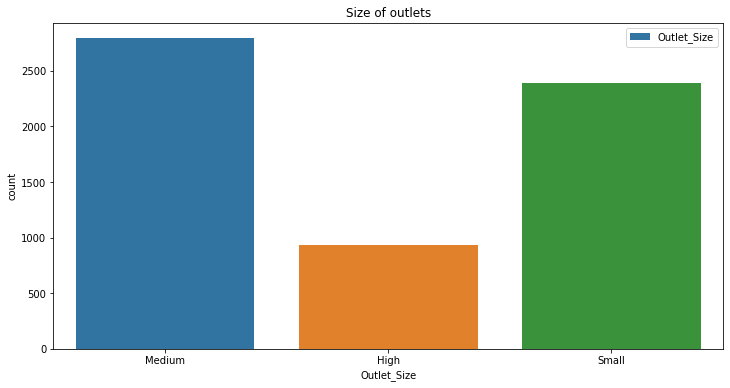

In [15]:
print('Size of the outlet',df['Outlet_Size'].value_counts())
print('\n')
print('Types of the outlet',df['Outlet_Size'].unique())
print('\n')
print('No. of Nan values',df['Outlet_Size'].isnull().sum())
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Size'],label='Outlet_Size')
plt.title('Size of outlets')
plt.xticks(rotation=360)
plt.legend()
plt.show()

Outlet_Establishment_Year of the outlet is 1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


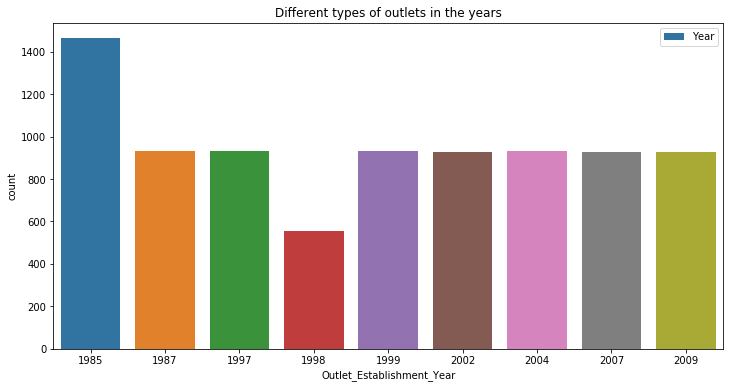

In [16]:
print('Outlet_Establishment_Year of the outlet is', df['Outlet_Establishment_Year'].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Establishment_Year'],label='Year')
plt.title('Different types of outlets in the years')
plt.xticks(rotation=360)
plt.legend()
plt.show()

Location type of the outlets ['Tier 1' 'Tier 3' 'Tier 2']


Location type of the outlets     index  Outlet_Location_Type
0  Tier 3                  3350
1  Tier 2                  2785
2  Tier 1                  2388




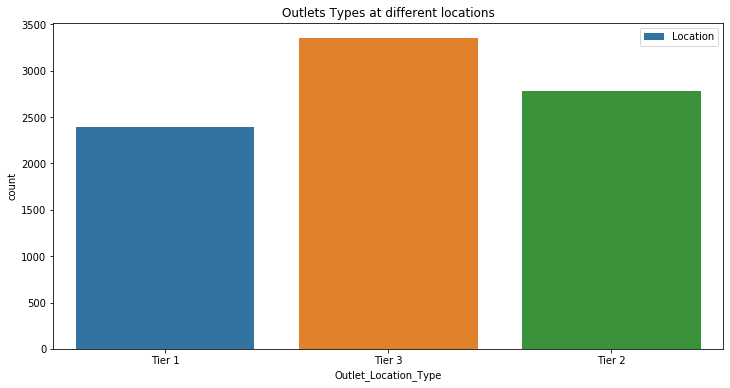

In [17]:
print('Location type of the outlets', df['Outlet_Location_Type'].unique())
print('\n')
print('Location type of the outlets', df['Outlet_Location_Type'].value_counts().reset_index())
print('\n')
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Location_Type'],label='Location')
plt.title('Outlets Types at different locations')
plt.xticks(rotation=360)
plt.legend()
plt.show()

Types of outlets ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


Types of outlets Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




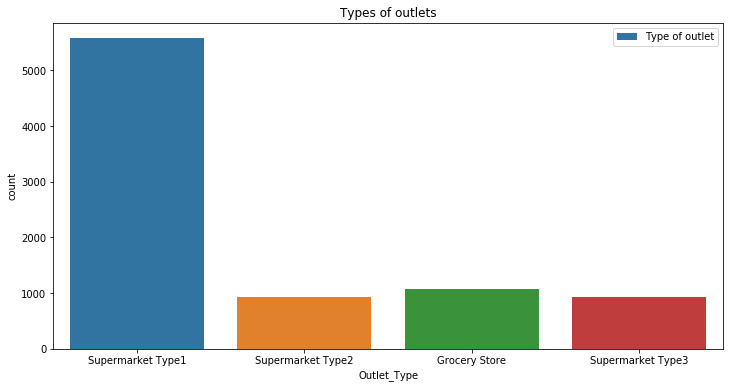

In [18]:
print('Types of outlets', df['Outlet_Type'].unique())
print('\n')
print('Types of outlets', df['Outlet_Type'].value_counts())
print('\n')
plt.figure(figsize=(12,6))
sns.countplot(df['Outlet_Type'],label='Type of outlet')
plt.title('Types of outlets')
plt.xticks(rotation=360)
plt.legend()
plt.show()

In [19]:
df['Outlet_Age'] =  2020 - df['Outlet_Establishment_Year']
print('Age of the outlet',df['Outlet_Age'])

Age of the outlet 0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: Outlet_Age, Length: 8523, dtype: int64


In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


In [21]:
## As we have included the Outlet age in the dataset we can drop the Outlet Establishment year
df=df.drop('Outlet_Establishment_Year',axis=1)

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33


In [23]:
df['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

Treating the Null Values

In [24]:
df.isnull().sum()

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
Outlet_Age                 0
dtype: int64

In [25]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [26]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Medium')

In [27]:
df['Outlet_Size'].isnull().sum()

0

In [28]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat', 'reg': 'Regular'})

In [30]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,33


Applying One Hot Encoding on Categorical Data

In [32]:
df_cat=df.loc[:,['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type']]

In [33]:
df_cat.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type
0,Low Fat,Medium,Tier 1,Supermarket Type1,Dairy
1,Regular,Medium,Tier 3,Supermarket Type2,Soft Drinks
2,Low Fat,Medium,Tier 1,Supermarket Type1,Meat
3,Regular,Medium,Tier 3,Grocery Store,Fruits and Vegetables
4,Low Fat,High,Tier 3,Supermarket Type1,Household


In [34]:
df_cat=pd.get_dummies(df_cat,drop_first=True)

In [35]:
df_cat.head()

,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [36]:
df=pd.concat([df,df_cat],axis=1)

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,...,0,0,0,0,1,0,0,0,0,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,...,0,0,0,1,0,0,0,0,0,0


In [38]:
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',]
df=df.drop(list,axis=1)

In [39]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,21,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,11,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,21,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,22,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,33,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

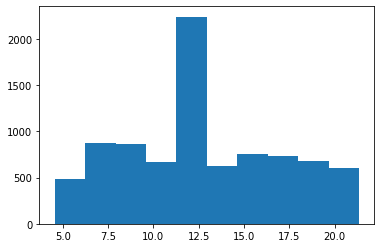

In [40]:
plt.hist(df['Item_Weight'])

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <a list of 10 Patch objects>)

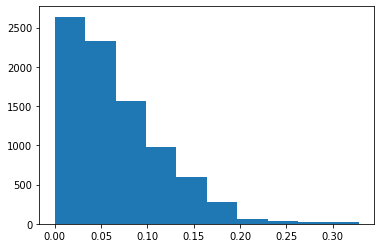

In [41]:
plt.hist(df['Item_Visibility'])

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

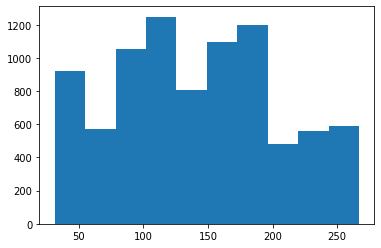

In [42]:
plt.hist(df['Item_MRP'])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <a list of 10 Patch objects>)

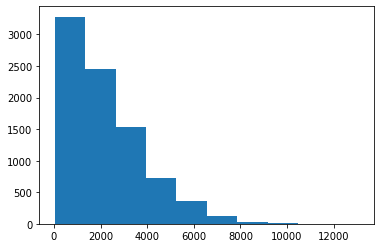

In [43]:
plt.hist(df['Item_Outlet_Sales'])

In [44]:
df.skew()

Item_Weight                         0.090561
Item_Visibility                     1.167091
Item_MRP                            0.127202
Item_Outlet_Sales                   1.177531
Outlet_Age                          0.396641
Item_Fat_Content_Regular            0.616705
Outlet_Size_Medium                 -0.453138
Outlet_Size_Small                   0.979119
Outlet_Location_Type_Tier 2         0.738834
Outlet_Location_Type_Tier 3         0.437995
Outlet_Type_Supermarket Type1      -0.649203
Outlet_Type_Supermarket Type2       2.511707
Outlet_Type_Supermarket Type3       2.498184
Item_Type_Breads                    5.567533
Item_Type_Breakfast                 8.632562
Item_Type_Canned                    3.196644
Item_Type_Dairy                     3.096356
Item_Type_Frozen Foods              2.659119
Item_Type_Fruits and Vegetables     2.021988
Item_Type_Hard Drinks               6.071724
Item_Type_Health and Hygiene        3.668801
Item_Type_Household                 2.547106
Item_Type_

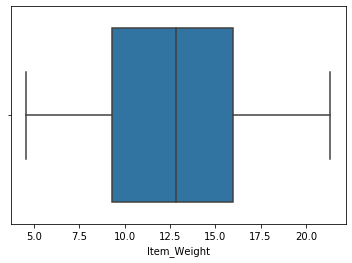

In [45]:
sns.boxplot(df['Item_Weight'])

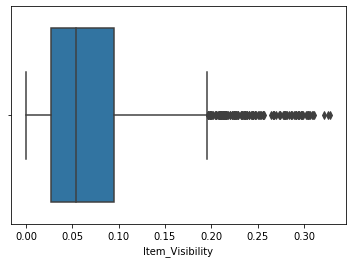

In [46]:
sns.boxplot(df['Item_Visibility'])

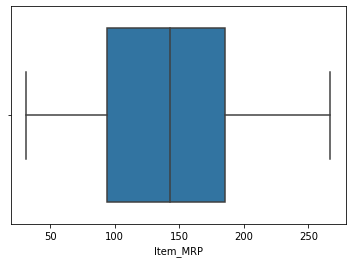

In [47]:
sns.boxplot(df['Item_MRP'])

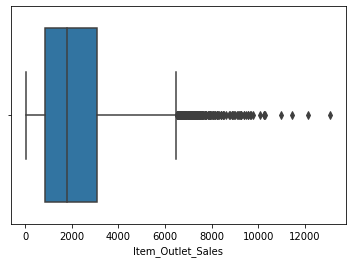

In [48]:
sns.boxplot(df['Item_Outlet_Sales'])

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df['Item_Outlet_Sales']))
z

array([0.910601  , 1.01844035, 0.04923754, ..., 0.57909963, 0.19672492,
       0.82959407])

In [50]:
threshold=3
print(np.where(z>3))

(array([ 130,  145,  276,  304,  333,  373,  456,  472,  661,  694,  753,
        809,  935,  991,  997, 1009, 1138, 1254, 1450, 1506, 1859, 1998,
       2109, 2216, 2238, 2293, 2516, 2535, 2776, 3083, 3087, 3098, 3154,
       3234, 3286, 3407, 3667, 3709, 3720, 3757, 4289, 4346, 4349, 4676,
       4681, 4772, 4888, 4961, 4991, 5065, 5177, 5185, 5223, 5315, 5500,
       5550, 5619, 5752, 5799, 5812, 5977, 6000, 6134, 6334, 6409, 6537,
       6541, 6606, 6886, 6993, 7016, 7076, 7188, 7191, 7236, 7256, 7302,
       7343, 7560, 7562, 7609, 7690, 7752, 7816, 7826, 7930, 8039, 8201,
       8245, 8447], dtype=int64),)


In [51]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,21,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,11,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,21,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,22,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,33,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# Feature Selection

In [52]:
x=df.drop('Item_Visibility',axis=1)

In [53]:
x.head()

,Item_Weight,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,249.8092,3735.1380,21,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,5.92,48.2692,443.4228,11,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,141.6180,2097.2700,21,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,19.20,182.0950,732.3800,22,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,53.8614,994.7052,33,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [54]:
y=df.loc[:,'Item_Outlet_Sales']

In [55]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# Model Building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [57]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
maxr2_score=0
for ran in range(42,101):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=ran)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    pred=lr.predict(xtest)
    r2_scr= r2_score(ytest,pred)
    print('r2_score for the corresponding random_state',ran,'is',r2_scr)
    if r2_scr>maxr2_score:
        maxr2_score=r2_scr
        final_rscore=ran
print()
print()
print('Max r_state for the Corresponding random_state of',final_rscore, 'is',maxr2_score)

r2_score for the corresponding random_state 42 is 1.0
r2_score for the corresponding random_state 43 is 1.0
r2_score for the corresponding random_state 44 is 1.0
r2_score for the corresponding random_state 45 is 1.0
r2_score for the corresponding random_state 46 is 1.0
r2_score for the corresponding random_state 47 is 1.0
r2_score for the corresponding random_state 48 is 1.0
r2_score for the corresponding random_state 49 is 1.0
r2_score for the corresponding random_state 50 is 1.0
r2_score for the corresponding random_state 51 is 1.0
r2_score for the corresponding random_state 52 is 1.0
r2_score for the corresponding random_state 53 is 1.0
r2_score for the corresponding random_state 54 is 1.0
r2_score for the corresponding random_state 55 is 1.0
r2_score for the corresponding random_state 56 is 1.0
r2_score for the corresponding random_state 57 is 1.0
r2_score for the corresponding random_state 58 is 1.0
r2_score for the corresponding random_state 59 is 1.0
r2_score for the correspondi

# Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score
cross=cross_val_score(lr,x,y,cv=5)

In [59]:
cross.mean()

1.0

In [60]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1,0.1,0.01,0.001,0.0001,0.02,0.003,0.049,0.167,0.1]}
ridge=Ridge()
clf=GridSearchCV(lasso,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'alpha': 0.0001}


In [61]:
parameters={'alpha':[1,0.1,0.01,0.001,0.0001,0.02,0.003,0.049,0.167,0.1]}
ridge=Ridge()
dlf=GridSearchCV(ridge,parameters)
dlf.fit(x,y)
print(clf.best_params_)

{'alpha': 0.0001}


# Lasso, Ridge and Linear Regression on the model

In [62]:
from sklearn.linear_model import Lasso, Ridge
lasso=Lasso(alpha=0.0001)
ridge=Ridge(alpha=0.0001)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=72)
models=[lasso,ridge,lr]
for i in models:
    i.fit(xtrain,ytrain)
    predi=i.predict(xtest)
    print('\n')
    print('****************Model********************',i)
    print('\n')
    print('score of the training models', i.score(xtrain,ytrain))
    print('r2 score of the model is',r2_score(ytest,predi))
    print('Mean absolute error:', mean_absolute_error(ytest,predi))
    print('Mean squared error:', mean_squared_error(ytest,predi))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(ytest,predi)))
print()
print()



****************Model******************** Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


score of the training models 1.0
r2 score of the model is 1.0
Mean absolute error: 8.310539170517781e-06
Mean squared error: 1.2527226524024714e-10
Root Mean Squared Error: 1.1192509336169756e-05


****************Model******************** Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


score of the training models 1.0
r2 score of the model is 1.0
Mean absolute error: 8.739859015716525e-12
Mean squared error: 1.3735010450625826e-22
Root Mean Squared Error: 1.1719646091339886e-11


****************Model******************** LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


score of the training models 1.0
r2 score of the model

# Working on the test_dataset

In [63]:
test=pd.read_csv('bigdata_test.csv')

In [64]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [65]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [66]:
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [67]:
test['Item_Weight'].isnull().sum()

0

In [68]:
test['Outlet_Size'].unique()

array(['Medium', nan, 'Small', 'High'], dtype=object)

In [69]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [70]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [71]:
test['Outlet_Size'].isnull().sum()

0

In [72]:
test['Item_Fat_Content'].unique()


array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [73]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace({'low fat':'Low Fat','LF':'Low Fat', 'reg': 'Regular'})
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [74]:
test_cat=test.loc[:,['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type']]

In [75]:
test_cat.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type
0,Low Fat,Medium,Tier 1,Supermarket Type1,Snack Foods
1,Regular,Medium,Tier 2,Supermarket Type1,Dairy
2,Low Fat,Medium,Tier 3,Grocery Store,Others
3,Low Fat,Medium,Tier 2,Supermarket Type1,Snack Foods
4,Regular,Medium,Tier 3,Supermarket Type3,Dairy


In [76]:
test_cat=pd.get_dummies(test_cat,drop_first=True)

In [77]:
test_cat.head()

,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
test_cat.head()

,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
test=pd.concat([test,test_cat],axis=1)

In [80]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,...,0,0,0,0,0,0,0,1,0,0
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,...,0,0,0,0,0,0,0,0,0,0
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,...,0,0,0,0,0,1,0,0,0,0
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,...,0,0,0,0,0,0,0,1,0,0
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,...,0,0,0,0,0,0,0,0,0,0


In [82]:
list=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type',]
test=test.drop(list,axis=1)

In [84]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,2007,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,7.315000,0.015388,155.0340,2007,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,12.695633,0.118599,234.2300,1985,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
test['Outlet_Age'] =  2020 - test['Outlet_Establishment_Year']

In [88]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Age
0,20.750000,0.007565,107.8622,1999,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,21
1,8.300000,0.038428,87.3198,2007,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,13
2,14.600000,0.099575,241.7538,1998,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,22
3,7.315000,0.015388,155.0340,2007,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,13
4,12.695633,0.118599,234.2300,1985,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,35


In [92]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Age
0,20.750000,0.007565,107.8622,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,21
1,8.300000,0.038428,87.3198,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,13
2,14.600000,0.099575,241.7538,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,22
3,7.315000,0.015388,155.0340,0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,13
4,12.695633,0.118599,234.2300,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,35


In [101]:
lr.predict(test)

array([107.8622,  87.3198, 241.7538, ..., 118.744 , 214.6218,  79.796 ])

In [102]:
lasso.predict(test)

array([107.8621969 ,  87.31979674, 241.75379794, ..., 118.74399698,
       214.62179774,  79.79599668])

In [107]:
dlf.predict(test)

array([107.86220003,  87.31979993, 241.75380002, ..., 118.74399994,
       214.62179992,  79.79599994])

# Prediction using the models on the test data

In [116]:
models=[lasso,dlf,lr]
for i in models:
    i.fit(xtrain,ytrain)
    predi=i.predict(test)
    print('Predictions in the Lasso Regression',predi)
    print('\n')
    print('Predictions in the Ridge Regression',predi)
    print('\n')
    print('Predictions in the Linear Regression',predi)
    break
print('\n')
print('All the models predict almost the same values in the prediction')

Predictions in the Lasso Regression [107.8621969   87.31979674 241.75379794 ... 118.74399698 214.62179774
  79.79599668]


Predictions in the Ridge Regression [107.8621969   87.31979674 241.75379794 ... 118.74399698 214.62179774
  79.79599668]


Predictions in the Linear Regression [107.8621969   87.31979674 241.75379794 ... 118.74399698 214.62179774
  79.79599668]


All the models predict almost the same values in the prediction


# Saving the Model

In [118]:
from sklearn.externals import joblib
joblib.dump(lr,'salespredict.obj')

['salespredict.obj']